In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

In [2]:
heart_data = pd.read_csv('heart.csv')
df = pd.DataFrame(heart_data)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# data visualization 

<Axes: xlabel='cp'>

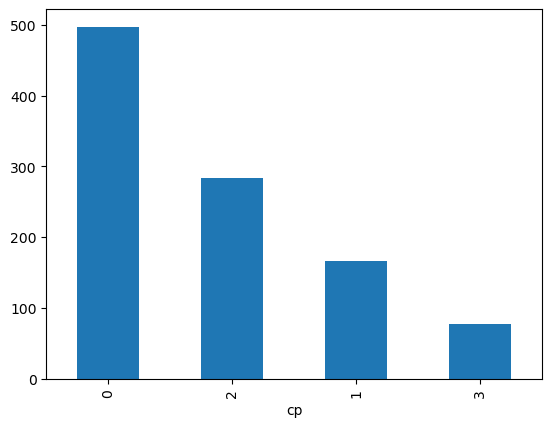

In [12]:
df['cp'].value_counts().plot.bar()

<Axes: xlabel='sex', ylabel='Density'>

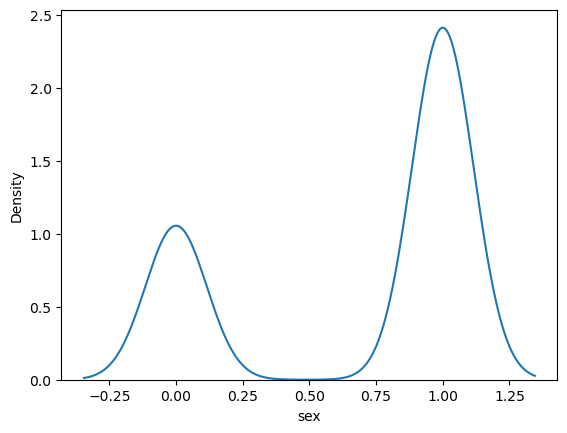

In [13]:
sns.kdeplot(df['sex'])

<Axes: xlabel='cp', ylabel='count'>

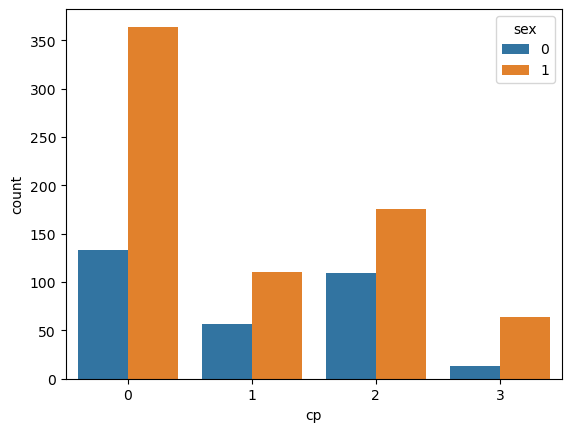

In [14]:
sns.countplot(x=df['cp'],hue=df['sex'])

<Axes: xlabel='sex', ylabel='count'>

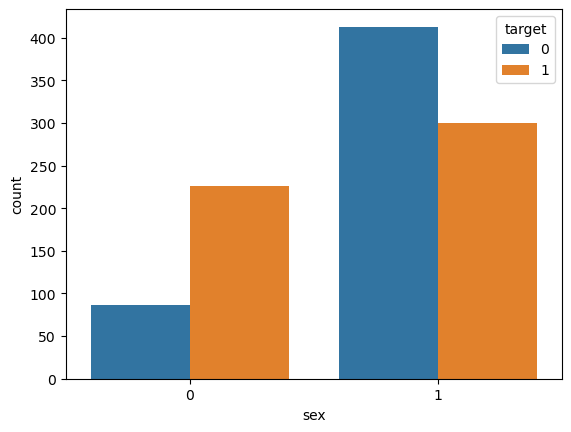

In [15]:
sns.countplot(x=df['sex'],hue=df['target'])

<Axes: xlabel='age'>

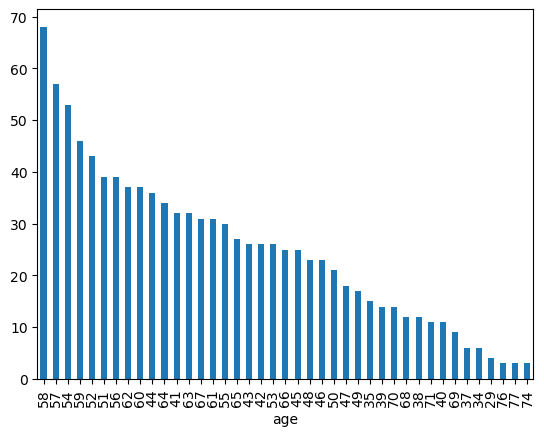

In [16]:
df['age'].value_counts().plot.bar()

<Axes: xlabel='age', ylabel='Count'>

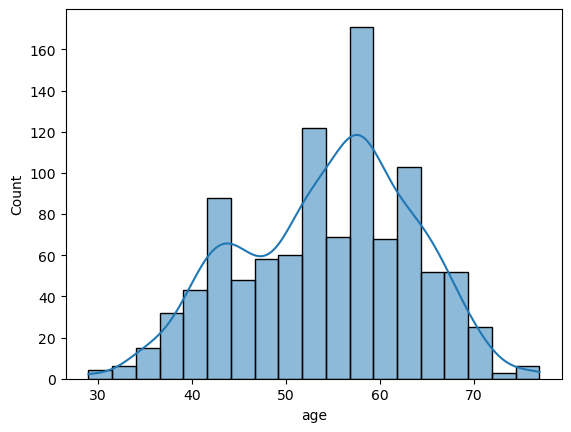

In [17]:
sns.histplot(df['age'],kde='true')

<Axes: xlabel='sex', ylabel='Density'>

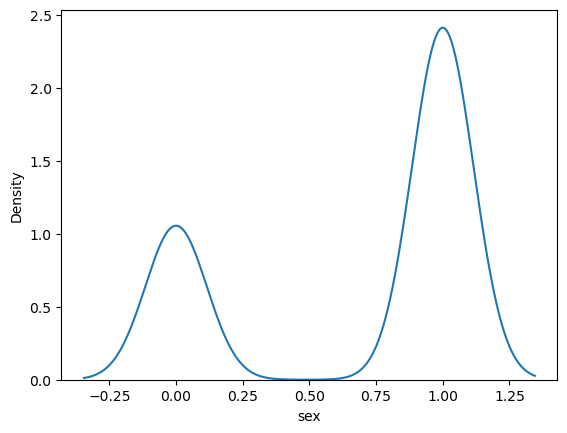

In [18]:
sns.kdeplot(df['sex'])

<Axes: >

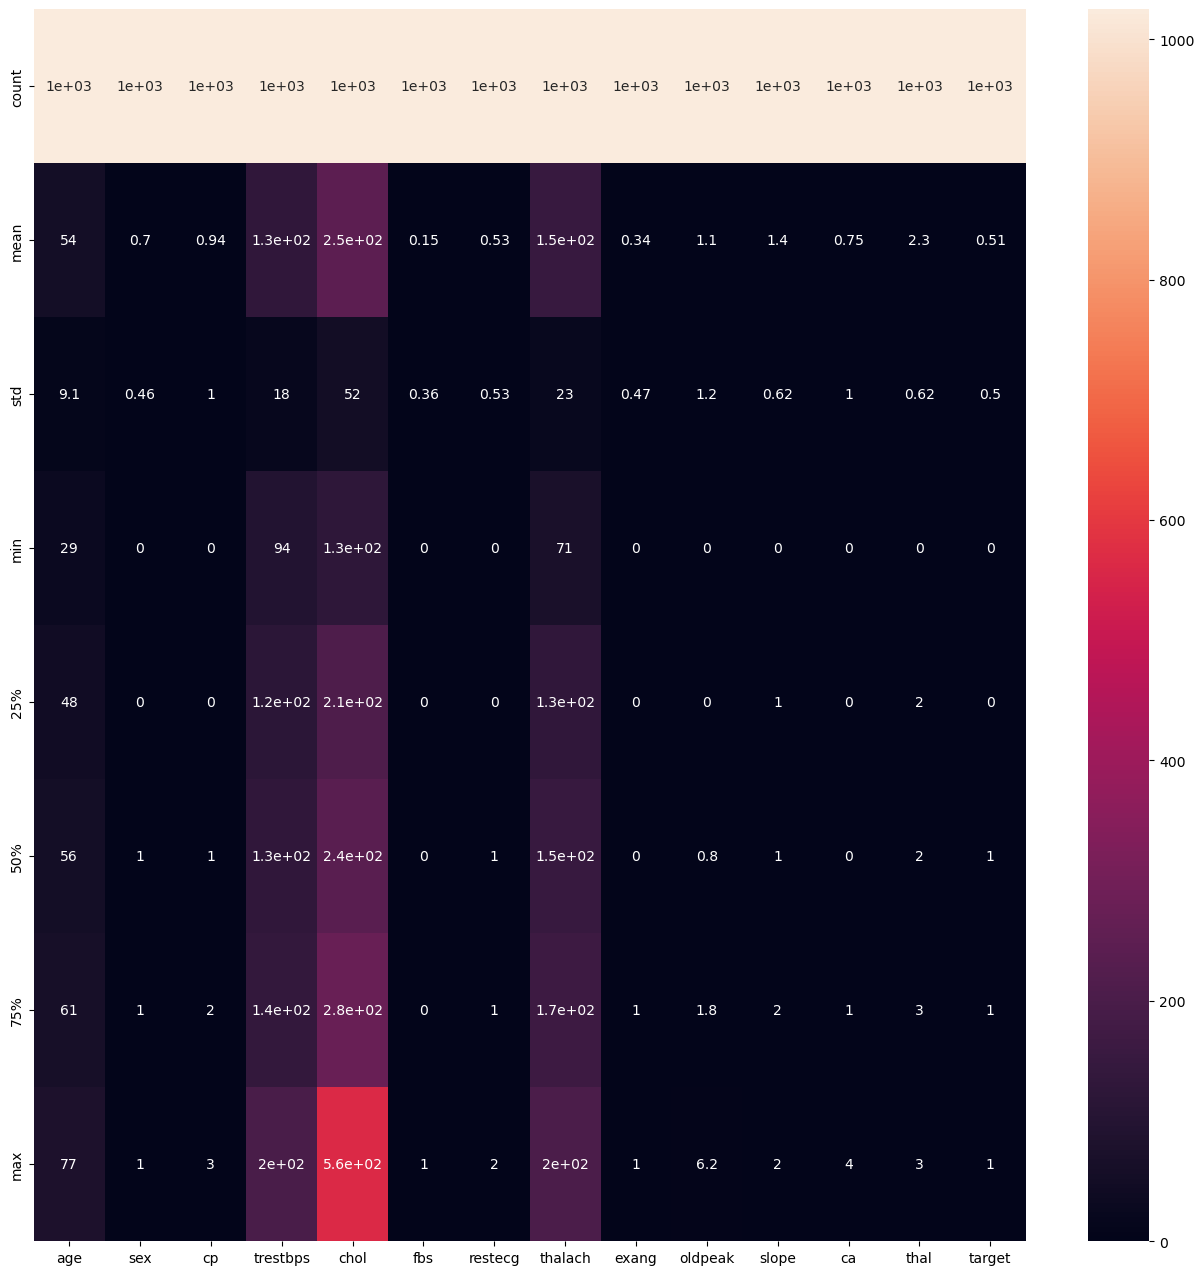

In [19]:
plt.figure(figsize=(16,16))
sns.heatmap(df.describe(),annot=True)

In [8]:
# seprating the main column from the rest of columns 
# y will contain the main target column 
x = df.drop('target', axis=1)  
y = df['target']

In [9]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [10]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [21]:
# spliting the values into x train , y train , x test and y test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [33]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3
921,58,1,0,146,218,0,1,105,0,2.0,1,1,3
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3
107,62,1,1,120,281,0,0,103,0,1.4,1,1,3


In [34]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
576,52,1,3,152,298,1,1,178,0,1.2,1,0,3
254,35,1,0,120,198,0,1,130,1,1.6,1,0,3
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
929,60,1,0,130,206,0,0,132,1,2.4,1,2,3
539,64,1,3,170,227,0,0,155,0,0.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [25]:
len(x_train)

922

In [30]:
len(x_test)

103

In [35]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
294    0
921    0
464    1
107    0
629    0
Name: target, Length: 103, dtype: int64

In [36]:
y_train

576    1
254    0
723    1
929    0
539    1
      ..
700    1
71     0
106    0
270    1
860    0
Name: target, Length: 922, dtype: int64

In [27]:
len(y_train)

922

In [29]:
len(y_test)

103

In [22]:
# scaling the data (Z-scale normalization)
std_sc=StandardScaler()

In [23]:
std_sc

StandardScaler()

In [24]:
# scaling the data into normal form 
# having mean = 0 , standard deviation =1 
x_train_new=std_sc.fit_transform(x_train)
x_test_new=std_sc.fit_transform(x_test)

In [31]:
len(x_train_new)

922

In [32]:
len(x_test_new)

103

In [93]:
x_train_new = np.array(x_train_new)
y_train = np.array(y_train)
y_train_fornb=y_train

In [38]:
len(x_train_new)

922

In [42]:
len(y_train)

922

In [43]:
# using KNN model for analysis

In [44]:
knn = KNeighborsClassifier(n_neighbors=10) 

In [45]:
# training knn model with the values given in train 
knn.fit(x_train_new, y_train)

KNeighborsClassifier(n_neighbors=10)

In [46]:
# perdict the result from the values given in x_test
x_pred_new = knn.predict(x_test_new)

In [47]:
x_pred_new

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [48]:
accuracy = accuracy_score(y_test, x_pred_new)
print(f'Accuracy from KNN: {accuracy:.2f}')

Accuracy from KNN: 0.80


In [49]:
recall = recall_score(y_test, x_pred_new)
print(f'recall score  from KNN: {recall}')

recall score  from KNN: 0.8444444444444444


In [50]:
f1 = f1_score(y_test, x_pred_new)
print(f'recall score  from KNN: {f1}')

recall score  from KNN: 0.7835051546391751


In [51]:
roc_auc = roc_auc_score(y_test, knn.predict_proba(x_test_new)[:, 1])
print(f'ROC AUC  from KNN: {roc_auc}')

ROC AUC  from KNN: 0.9239463601532567


In [52]:
x_train_pred_new = knn.predict(x_train_new)
x_test_pred_new = knn.predict(x_test_new)
train_accuracy = accuracy_score(y_train, x_train_pred_new)
test_accuracy = accuracy_score(y_test, x_test_pred_new)

In [53]:
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.88
Test Accuracy: 0.80


In [100]:
# since tarining is performimg better than test cases so we can apply k fold method 

In [74]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_scores = []
test_scores = []
for train_index, test_index in kfold.split(x):
    x_train_new, x_test_new = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn.fit(x_train_new, y_train)
    train_score = knn.score(x_train_new, y_train)
    train_scores.append(train_score)
    
    test_score = knn.score(x_test_new, y_test)
    test_scores.append(test_score)
print(f'Mean training accuracy: {np.mean(train_scores):.2f}')
print(f'Mean test accuracy: {np.mean(test_scores):.2f}')

Mean training accuracy: 0.76
Mean test accuracy: 0.72


In [ ]:
# after appling k fold the difference reduce to less than 0.05 

In [ ]:
# from the following we can compare our predictions with acctual testing data

In [68]:
x_test_pred_new 

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [72]:
y_test_arrayform = np.array(y_test)

In [73]:
y_test_arrayform

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [98]:
# using Naive Bayes 

In [110]:
nb = GaussianNB()

In [111]:
nb.fit(x_train_new, y_train)

GaussianNB()

In [115]:
# Make predictions
x_train_pred_new_nb = nb.predict(x_train_new)
x_test_pred_new_nb = nb.predict(x_test_new)

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [117]:
accuracy = accuracy_score(y_test, x_pred_new)

In [82]:
print(f'Accuracy from Naive Bayes: {accuracy:.2f}')

Accuracy from Naive Bayes: 0.77


In [83]:
recall = recall_score(y_test, x_pred_new)

In [84]:
print(f'recall score from Naive Bayes: {recall}')

recall score from Naive Bayes: 0.8269230769230769


In [85]:
f1 = f1_score(y_test, x_pred_new)

In [86]:
print(f'recall score from Naive Bayes: {f1}')

recall score from Naive Bayes: 0.7889908256880734


In [87]:
roc_auc = roc_auc_score(y_test, knn.predict_proba(x_test_new)[:, 1])

In [88]:
print(f'ROC AUC from Naive Bayes: {roc_auc}')

ROC AUC from Naive Bayes: 0.7690384615384616


In [118]:
# Calculate accuracy scores
train_accuracy_nb = accuracy_score(y_train, x_train_pred_new_nb)
test_accuracy_nb = accuracy_score(y_test, x_test_pred_new_nb)

print(f"Train Accuracy: {train_accuracy_nb}")
print(f"Test Accuracy: {test_accuracy_nb}")

Train Accuracy: 0.8331527627302275
Test Accuracy: 0.7745098039215687


In [ ]:
# from the following boolean expressions we can take referrence of output

In [120]:
x_test_pred_new_nb

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [125]:
y_test_array = np.array(y_test)
y_test_array

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [119]:
# since our naive bayes train model is performing better in train then test so we will use k fold to reduce the overfiting 

In [131]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_scores = []
test_scores = []
for train_index, test_index in kfold.split(x):
    x_train_new, x_test_new = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn.fit(x_train_new, y_train)
    train_score = nb.score(x_train_new, y_train)
    train_scores.append(train_score)
    
    test_score = nb.score(x_test_new, y_test)
    test_scores.append(test_score)
print(f'Mean training accuracy: {np.mean(train_scores):.2f}')
print(f'Mean test accuracy: {np.mean(test_scores):.2f}')

Mean training accuracy: 0.83
Mean test accuracy: 0.83


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\adity\anacond